# **Ultimate Challenge**

## **Part 1 - exploratory data analysis**

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. 
- Aggregate these login counts based on 15minute
time intervals, and
- visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand.
- report/illustrate important features of the demand,
such as daily cycles.

If there are data quality issues, please report them.

In [44]:
# import libraries 
import json 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the JSON file and create a pandas DataFrame from it.

with open('logins.json', 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)

df['login_time'] = pd.to_datetime(df['login_time'])

df.head()


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


## **Aggregate these login counts based on 15minute time intervals**

In [5]:
# Convert 'login_time' to datetime and set as index
df['login_time'] = pd.to_datetime(df['login_time'])
df.set_index('login_time', inplace=True)

# Resample the data to 15-minute intervals and count the number of logins in each interval
df_15min = df.resample('15T').size()

# Rename the series
df_15min = df_15min.rename('login_counts')


/var/folders/ns/ldg2lqpn3gv6lxm55vph6x540000gn/T/ipykernel_1085/3142417423.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_15min = df.resample('15T').size()


In [7]:
df = pd.DataFrame(df_15min)


df.head()

,login_counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


## **Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand** 

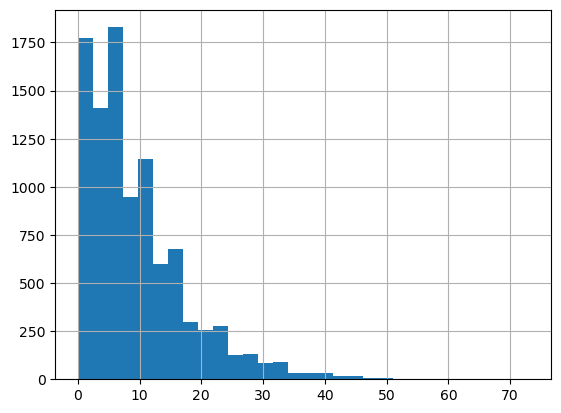

In [10]:
df['login_counts'].hist(bins=30)
plt.show()

In [12]:
Q1 = df['login_counts'].quantile(0.25)

Q3 = df['login_counts'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 3*IQR 
upper_bound = Q3 + 3*IQR 

df_outliers = df[(df['login_counts'] > upper_bound) | (df['login_counts'] < lower_bound)]

df_outliers.describe()


,login_counts
count,42.000000
mean,50.761905
std,7.039296
min,44.000000
25%,45.250000
50%,47.500000
75%,53.750000
max,73.000000


We plot this time series. 

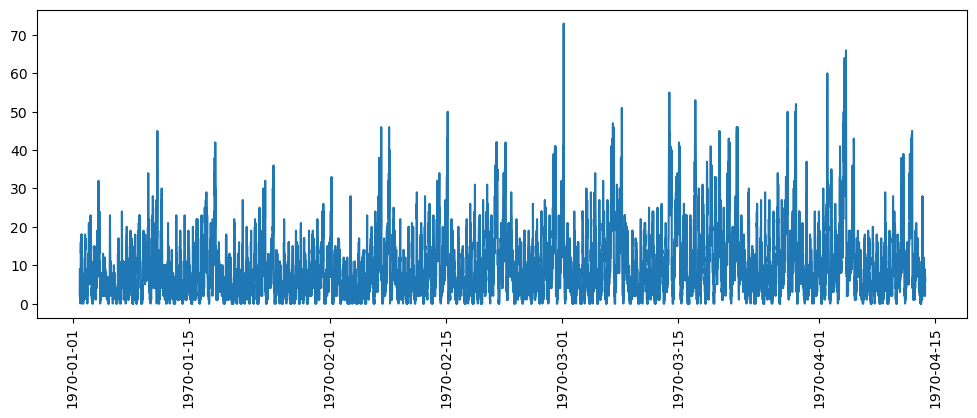

In [15]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df.login_counts)
plt.xticks(rotation = 90)
plt.show()

## **Report/illustrate important features of the demand, such as daily cycles**

### **The World Representation Theorem:**


Time series show several patterns, and each time series can be divided into several components. We can divide a time series into three-time series patterns: trend, seasonality, and residual. Trend and seasonality are less random than the residual, which is random with a normal distribution. 

The general idea of decomposing a time series is as follows:
- First, we check if the time series has an additive or multiplicative decomposition. The additive decomposition is used when the significance of the seasonal fluctuations or the variation around the trend is independent of the level of the time. It seems that our data can have an additive decomposition.

In the seasonal_decompose function, the period parameter specifies the number of observations per cycle of the seasonal component.
The period defines the length of the seasonality cycle. For example, if your data has a daily seasonality and you have hourly data, then period=24 because there are 24 hours in a day.
It tells the seasonal_decompose function how long one complete cycle of the seasonality is.

We write a function to give the trend, seasonality, and residual for a start_date, end_date, period.

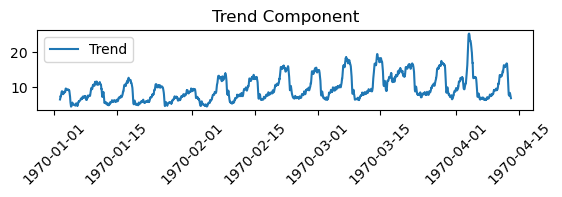

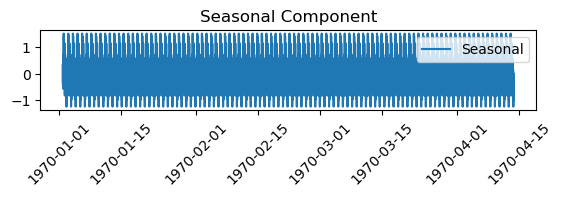

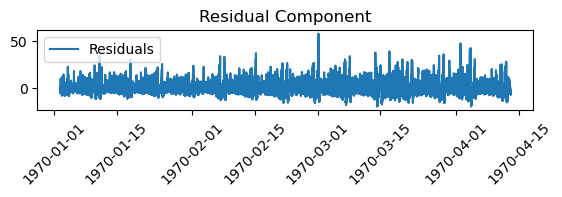

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df, model='additive', period=100) 
plt.subplot(411)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')
plt.xticks(rotation = 45)
plt.show()

plt.subplot(412)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal Component')
plt.xticks(rotation = 45)
plt.show()

plt.subplot(413)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.title('Residual Component')
plt.xticks(rotation = 45)
plt.show()

**To illustrate the seasonality better, we draw the diagrams in a shorter interval.**

In [22]:

def trend_seasonality_residual( start_date, end_date, number_of_parameters ):
    df_test = pd.DataFrame(df[(start_date <= df.index) & (df.index <= end_date)])
    df_test.index = pd.to_datetime(df_test.index)
    plt.figure(figsize=(6, 2))
    plt.plot(df_test.index, df_test.login_counts)
    plt.xticks(rotation = 90)
    plt.show()
    result = seasonal_decompose(df_test, model='additive', period=number_of_parameters) 
    plt.subplot(411)
    plt.plot(result.trend, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend Component')
    plt.xticks(rotation = 45)
    plt.show()
    plt.subplot(412)
    plt.plot(result.seasonal, label='Seasonal')
    plt.legend(loc='best')
    plt.title('Seasonal Component')
    plt.xticks(rotation = 45)
    plt.show()
    plt.subplot(413)
    plt.plot(result.resid, label='Residuals')
    plt.legend(loc='best')
    plt.title('Residual Component')
    plt.xticks(rotation = 45)
    plt.show()



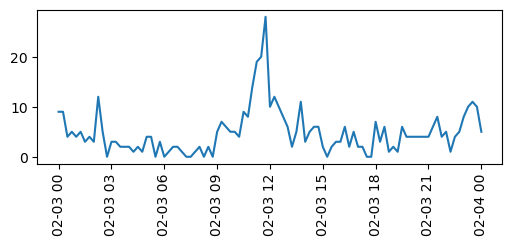

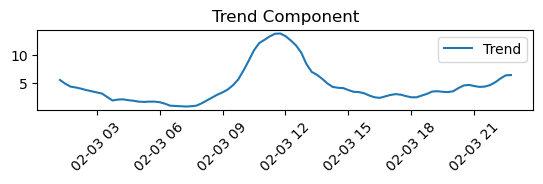

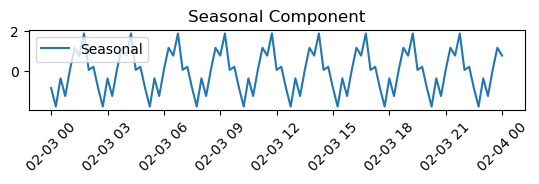

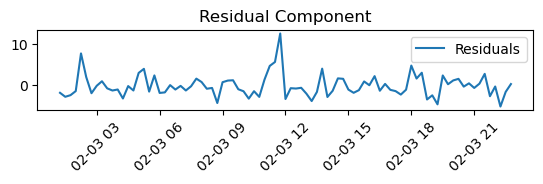

In [23]:
import datetime
trend_seasonality_residual( datetime.datetime(1970, 2, 3, 0, 0), datetime.datetime(1970, 2, 4, 0, 0), 10 )

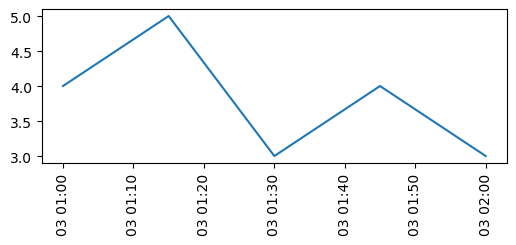

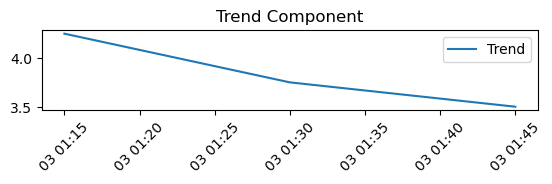

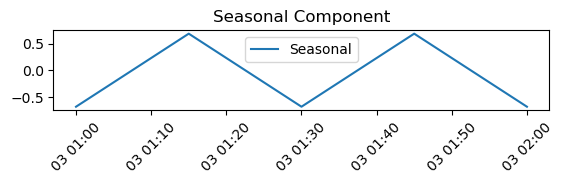

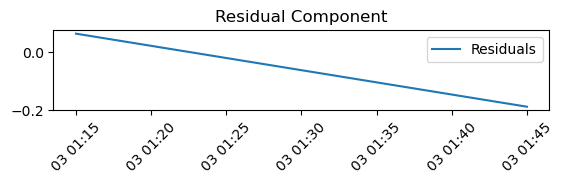

In [24]:
trend_seasonality_residual( datetime.datetime(1970, 2, 3, 1, 0), datetime.datetime(1970, 2, 3, 2, 0), 2 )

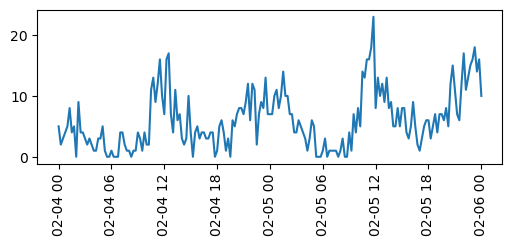

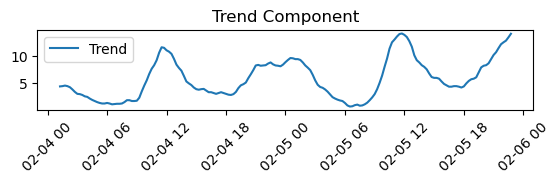

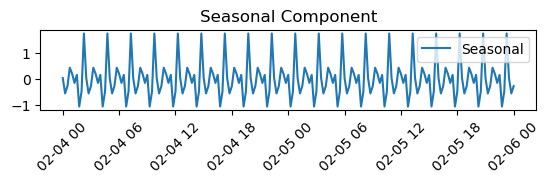

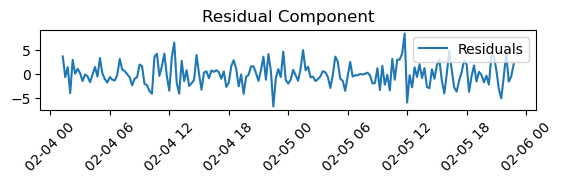

In [25]:
trend_seasonality_residual( datetime.datetime(1970, 2, 4, 0, 0), datetime.datetime(1970, 2, 6, 0, 0), 10 )

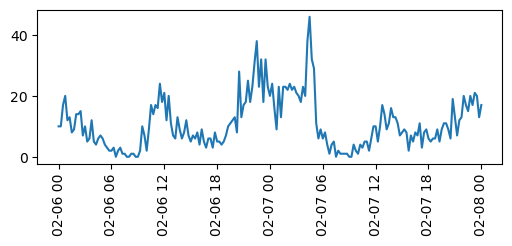

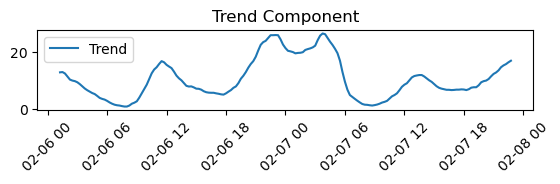

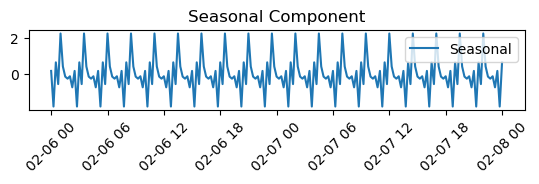

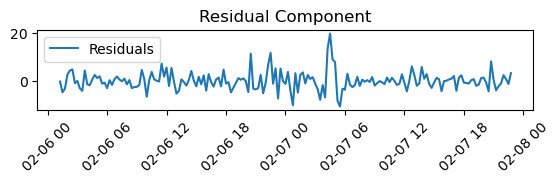

In [26]:
trend_seasonality_residual( datetime.datetime(1970, 2, 6, 0, 0), datetime.datetime(1970, 2, 8, 0, 0), 10 )

### **Conclusion:** The must number of login happens at noon or at midnight.  

# **Part 2 ‐ Experiment and Metrics Design**

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities by reimbursing all toll costs.




1) **What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?**

${\color{red}\rm Answer:}$
Increase in the number of drivers serving both cities. The experiment's goal is to encourage driver-partners to serve both cities. Therefore, our metric should directly reflect the increase in cross-city driver activity.


2) **Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success.** Please provide details on:
   a) How you will implement the experiment  
   b) What statistical test(s) you will conduct to verify the significance of the observation  
   c) How you would interpret the results and provide recommendations to the city operations team along with any caveats.

${\color{red}\rm Answer:}$ Choosing 1000 drivers on random and diving them to two groups: 

**Control group:** This group will not be reimbursed for the toll cost. 

**Experimental group:** This group will be reimbursed for the toll cost. 

We run the experiment for a month. Then, we will conduct the experiment for at least a month. We will track the number of trips, the unique driver partners serving both cities and the total toll reimbursements.

**Statistical Test:** We compare the proportion of driver partners serving both cities between the control and experimental groups using a z-test for proportions.

**Null Hypothesis ($H_0$):** There is no difference in the proportion of drivers serving both cities between the control and experimental groups.

**Alternative Hypothesis ($H_₁$):** There is an increase in the proportion of drivers serving both cities in the experimental group compared to the control group.

**Result:** If the p-value from the z-test is less than the significance level (commonly 0.05), reject the null hypothesis. This indicates that the toll reimbursement policy effectively increases the proportion of drivers serving both cities.

**Recommendations:** If the results are statistically significant, recommend implementing the toll reimbursement policy. We also meanwhile ask the drivers for feedback before implementing the toll reimbursement poly. 

We provide a detailed report with statistical findings, including confidence intervals and effect sizes, to support decision-making.

**Caveats:** We should consider potential external factors (e.g., seasonal variations, economic changes) that might influence driver behaviour.
We should also ensure that the toll reimbursement process is straightforward and transparent to avoid confusion and driver dissatisfaction.


# **Part 3 ‐ Predictive Modeling**

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e., took a trip) in the preceding 30 days. 

We would like you to use this data set to help understand what factors are the best predictors for retention and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file `ultimate_data_challenge.json`. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. **Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis** (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. **Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system.** Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. **Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention** (again, a few sentences will suffice).


## Data Description

- **city**: City this user signed up in.
- **phone**: Primary device for this user.
- **signup_date**: Date of account registration; in the form ‘YYYYMMDD’.
- **last_trip_date**: The last time this user completed a trip; in the form ‘YYYYMMDD’.
- **avg_dist**: The average distance in miles per trip taken in the first 30 days after signup.
- **avg_rating_by_driver**: The rider’s average rating over all of their trips.
- **avg_rating_of_driver**: The rider’s average rating of their drivers over all of their trips.
- **surge_pct**: The percent of trips taken with surge multiplier > 1.
- **avg_surge**: The average surge multiplier over all of this user’s trips.
- **trips_in_first_30_days**: The number of trips this user took in the first 30 days after signing up.
- **ultimate_black_user**: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise.
- **weekday_pct**: The percent of the user’s trips occurring during a weekday.


In [33]:
# Load the JSON file and create a pandas DataFrame from it.

with open('ultimate_data_challenge.json', 'r') as file:
    data = json.load(file)

df_ult = pd.DataFrame(data)

df_ult.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [144]:
df_ult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### **Handling missing values**

In [138]:
df_ult.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

We have three columns with missing data, ``avg_rating_of_driver``, ``phone``, and ``avg_rating_by_driver ``. As our target is to predict retentin, the ``phone`` is not a factor so we drop this column. For ``avg_rating_of_driver`` and ``avg_rating_by_driver `` we use Using K-Nearest Neighbors (KNN) for imputing missing values. 

In [36]:
df1 = df_ult.drop(columns=['phone'])
df1.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9


In [46]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 10)
numeric_df = df1.select_dtypes(include = [np.number])

imputed_data = imputer.fit_transform(numeric_df)

imputed_df = pd.DataFrame(imputed_data, columns = numeric_df.columns)

df1['avg_rating_of_driver'] = imputed_df['avg_rating_of_driver']
df1['avg_rating_by_driver'] = imputed_df['avg_rating_by_driver']

In [48]:
df1.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

### **Convert data types**

In [59]:
df1['signup_date'] = pd.to_datetime(df1['signup_date'])

df1['last_trip_date'] = pd.to_datetime(df1['last_trip_date'])

In [61]:
df1.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9


### **Target Feature**


In [87]:
most_recent_date = df1['last_trip_date'].max()

df1['is_retained'] = (df1['last_trip_date'] >= df1['signup_date'] ).astype(int) & ((df1['signup_date']+pd.Timedelta(days=180)) <= most_recent_date ).astype(int)


df1.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,is_retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0


# Exploratory Data Analysis (EDA)

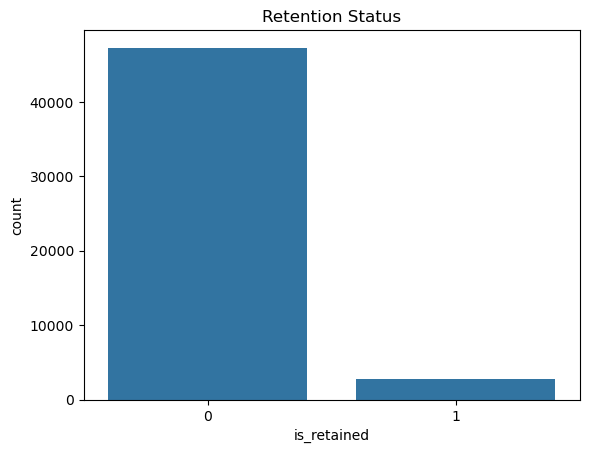

In [89]:
import seaborn as sns 

sns.countplot(x='is_retained', data=df1)
plt.title("Retention Status")
plt.show()

We also need to check the number of people who signed up recently. 

In [94]:
df1['new_user'] = (df1['signup_date']>= (most_recent_date - pd.Timedelta(days=180))).astype(int)

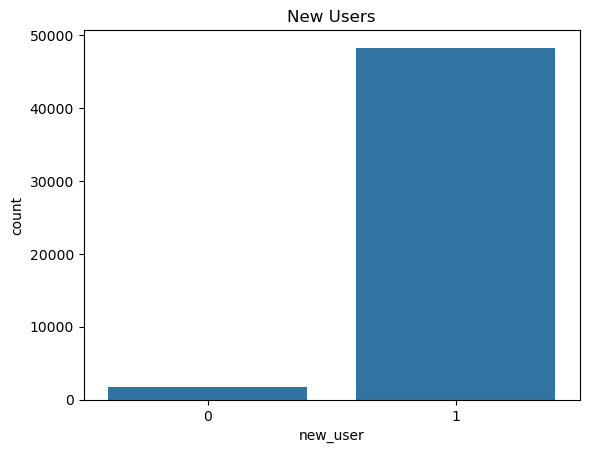

In [96]:
sns.countplot(x='new_user', data=df1)
plt.title("New Users")
plt.show()

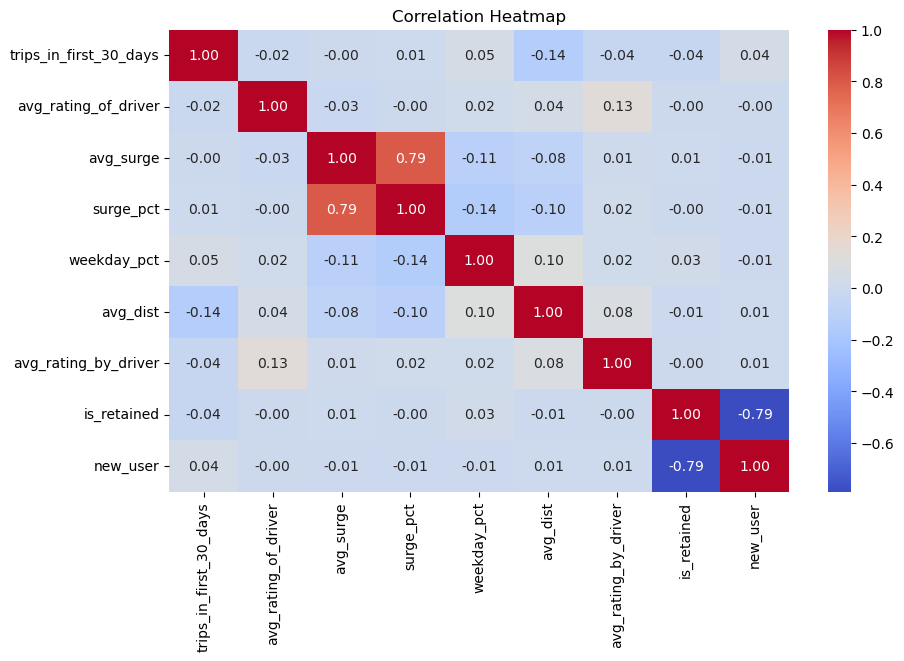

Fraction of retained users: 0.05


In [100]:
numeric_df = df1.select_dtypes(include = [np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Fraction of retained users
retention_fraction = numeric_df['is_retained'].mean()
print(f"Fraction of retained users: {retention_fraction:.2f}")

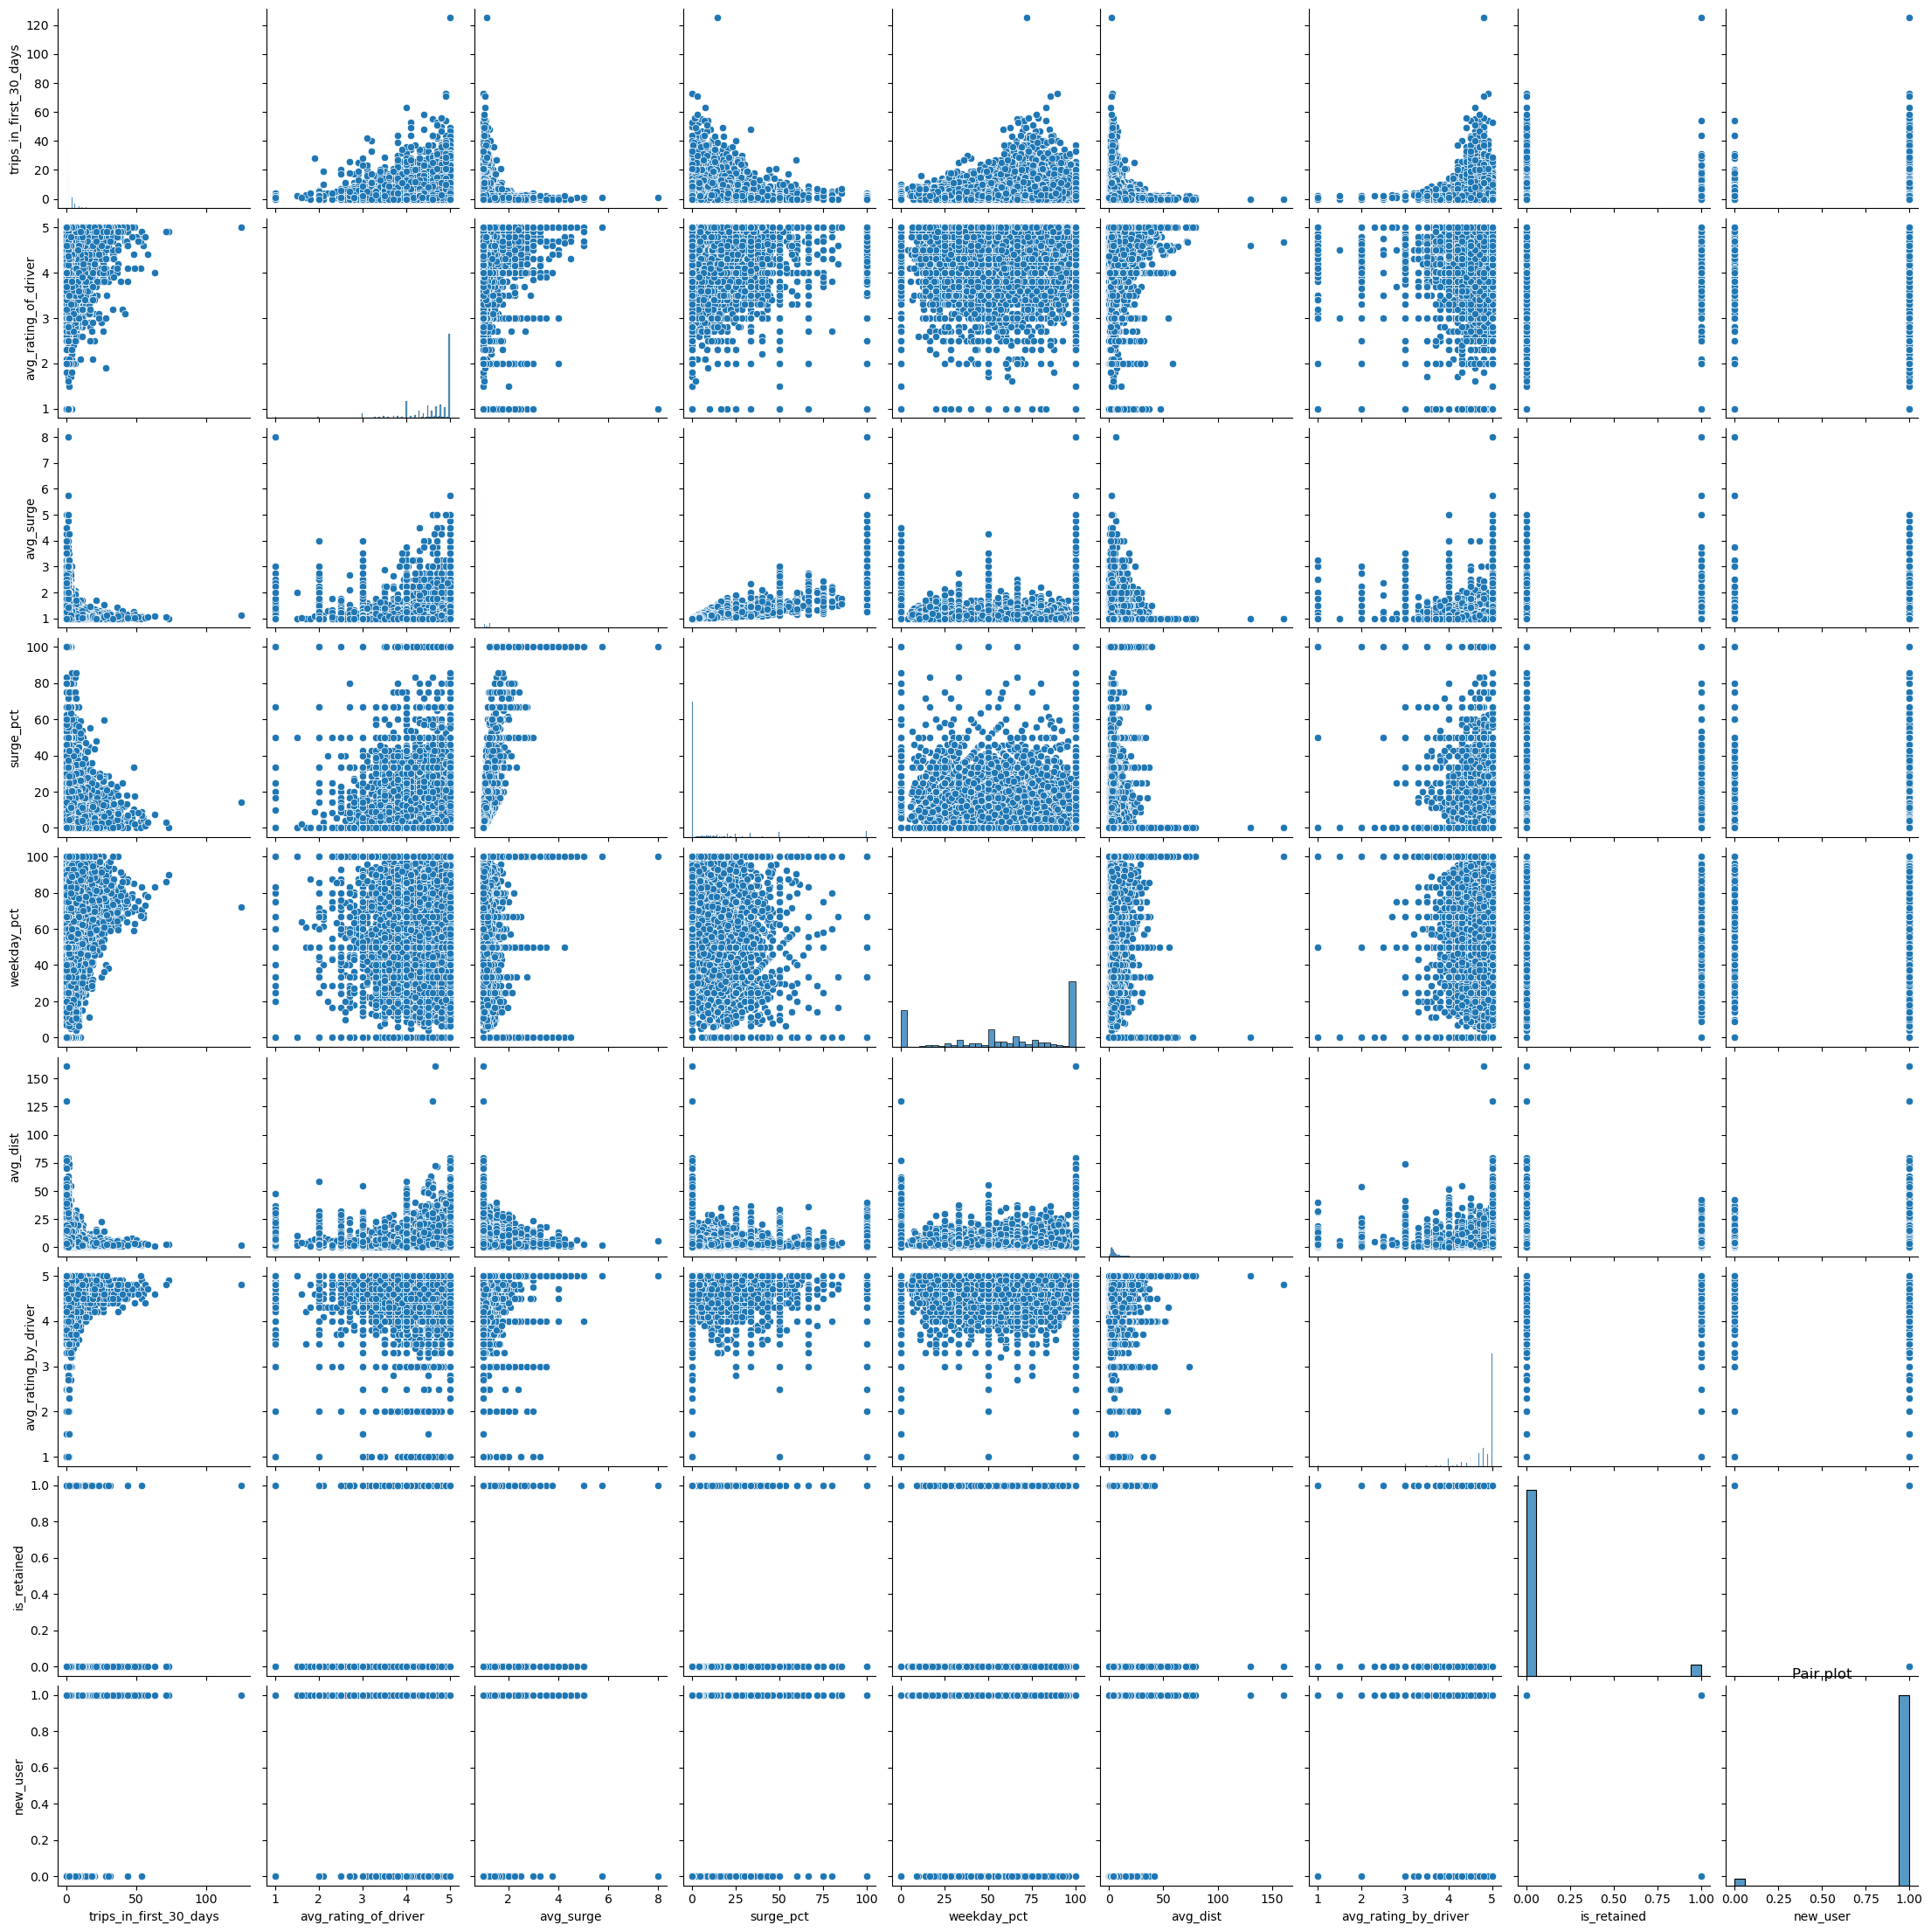

In [104]:
sns.pairplot(numeric_df)
plt.title("Pair plot")
plt.show()

## **Model Selection** 
By looking at the scatter plot, logistic regression would be a good model for prediction. 

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = numeric_df.drop(columns=['is_retained'])
y = numeric_df['is_retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.98
Confusion Matrix:
[[9457    0]
 [ 175  368]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9457
           1       1.00      0.68      0.81       543

    accuracy                           0.98     10000
   macro avg       0.99      0.84      0.90     10000
weighted avg       0.98      0.98      0.98     10000



**The model suffers from overfitting.** Let's check which variables are important. 

In [140]:
X = numeric_df[['avg_rating_by_driver', 'avg_rating_of_driver',
          'trips_in_first_30_days', 'weekday_pct']]
y = numeric_df['is_retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.95
Confusion Matrix:
[[9457    0]
 [ 543    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9457
           1       0.00      0.00      0.00       543

    accuracy                           0.95     10000
   macro avg       0.47      0.50      0.49     10000
weighted avg       0.89      0.95      0.92     10000



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [142]:
X = numeric_df[['avg_rating_by_driver', 'avg_rating_of_driver']]
y = numeric_df['is_retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.95
Confusion Matrix:
[[9457    0]
 [ 543    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9457
           1       0.00      0.00      0.00       543

    accuracy                           0.95     10000
   macro avg       0.47      0.50      0.49     10000
weighted avg       0.89      0.95      0.92     10000



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Conculsion:** 

Running these models, it is clear that ``avg_rating_by_driver``, the rider’s average rating over all of their trips and 
``avg_rating_of_driver``, the rider’s average rating of their drivers over all of their trips, are very important and could be an indicator of if someone retained or not. 

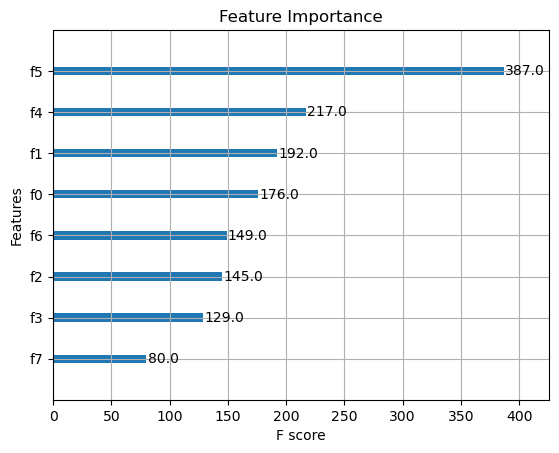

                  Feature  Importance
5                avg_dist       387.0
4             weekday_pct       217.0
1    avg_rating_of_driver       192.0
0  trips_in_first_30_days       176.0
6    avg_rating_by_driver       149.0
2               avg_surge       145.0
3               surge_pct       129.0
7                new_user        80.0


In [147]:
import xgboost as xgb

X = numeric_df.drop(columns=['is_retained'])
y = numeric_df['is_retained']


feature_names = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)


model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)



xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

importance = model.get_booster().get_score()
importance_df = pd.DataFrame({
    'Feature': [feature_names[int(f[1:])] for f in importance.keys()],
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False)

print(importance_df)
